# Mnist Classification

In [1]:
import tensorflow as tf
import numpy as np

### 케라스 내장 데이터셋
- boston_housing : 보스톤 주택 가격
- cifar10 : 이미지 분류
- cifar100 : 이미지 분류
- mnist : 손글씨
- fashio_mnist : 의류 이미지 데이터
- imdb : 영화 데이터 (평가글)
- reuters : 뉴스 토픽

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
print(type(mnist))

<class 'module'>


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


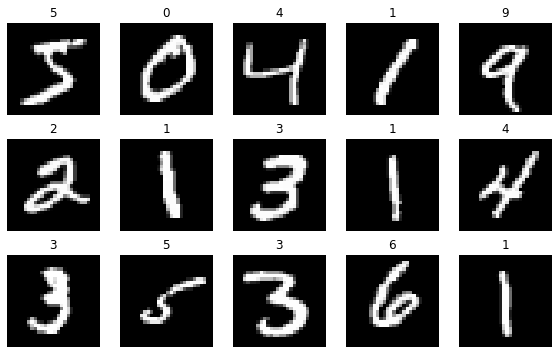

In [5]:
# 데이터 시각화
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()


In [6]:
# 데이처 전처리
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [7]:
# 픽셀 값의 최소 / 최대 값 확인
print(f'정규화 전 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전 최소값: 0, 최대값: 255


In [8]:
# 데이터 정규화
x_train = x_train / x_train.max()

In [9]:
print(f'정규화 후 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 후 최소값: 0.0, 최대값: 1.0


In [10]:
x_test = x_test / x_test.max()

In [11]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [12]:
# Flatten 레이어
print(f'변경전 shape {x_train.shape}')
print(f'1D로 shape 변경 후 {x_train.reshape(60000, -1).shape}')

변경전 shape (60000, 28, 28)
1D로 shape 변경 후 (60000, 784)


In [13]:
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

Flatten 적용 후 : (60000, 784)


In [14]:
# 활성화 함수
tf.keras.layers.Dense(units=128, activation='relu')

In [15]:
model = tf.keras.models.Sequential([
                             tf.keras.layers.Dense(128),
                             tf.keras.layers.Activation('relu')
                             ])

In [16]:
# 입출력
model = tf.keras.Sequential([
                                   tf.keras.layers.Flatten(input_shape=(28, 28)),
                                   tf.keras.layers.Dense(256, activation='relu'),
                                   tf.keras.layers.Dense(64, activation='relu'),
                                   tf.keras.layers.Dense(32, activation='relu'),
                                   tf.keras.layers.Dense(16, activation='relu'),
                                   # 마지막 출력 노드 = 10 (분류 갯수)
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])

In [17]:
# 마지막 출력층 노드 = 1 인경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 마지막 출력층 노드 = 10 인경우, softmax
tf.keras.layers.Dense(10, activation='softmax')


In [18]:
# 손실함수
# 마지막 출력층 노드 = 1 인경우
model.compile(loss = 'binary_crossentropy')

# 마지막 출력층 노드 = 10 인경우, 원 핫 벡터인경우 [0., 1., 0, .....]
model.compile(loss = 'categorical_crossentropy')

# 마지막 출력층 노드 = 10 인경우, 원 핫 벡터 아닌경우
model.compile(loss = 'sparse_categorical_crossentropy')


In [19]:
# 옵티마이저
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
# 평가지표
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[acc])

# 문자열 지정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
print(y_train[1])

0


In [22]:
# 훈력
model.fit(x_train, y_train, 
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2526 - accuracy: 0.9233 - val_loss: 0.1215 - val_accuracy: 0.9625
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1027 - accuracy: 0.9692 - val_loss: 0.0913 - val_accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 0.0975 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0734 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0830 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0863 - val_accuracy: 0.9755
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0806 - val_accuracy:

In [24]:
# 검증, 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증셋 정확도: ', test_acc, test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1014 - accuracy: 0.9747
검증셋 정확도:  0.9746999740600586 0.10139895975589752


In [25]:
# 예측
predictions = model.predict(x_test)

In [26]:
predictions.shape

(10000, 10)

In [30]:
print(predictions[0])

[9.6180649e-08 5.6575209e-07 5.1794973e-07 4.8647036e-07 2.5018218e-07
 1.0787917e-08 4.6756957e-14 9.9995804e-01 2.1876849e-07 3.9871738e-05]


In [31]:
print(np.argmax(predictions[0]))

7


In [34]:
print(np.argmax(predictions[:10], axis = 1))

[7 2 1 0 4 1 8 9 5 9]


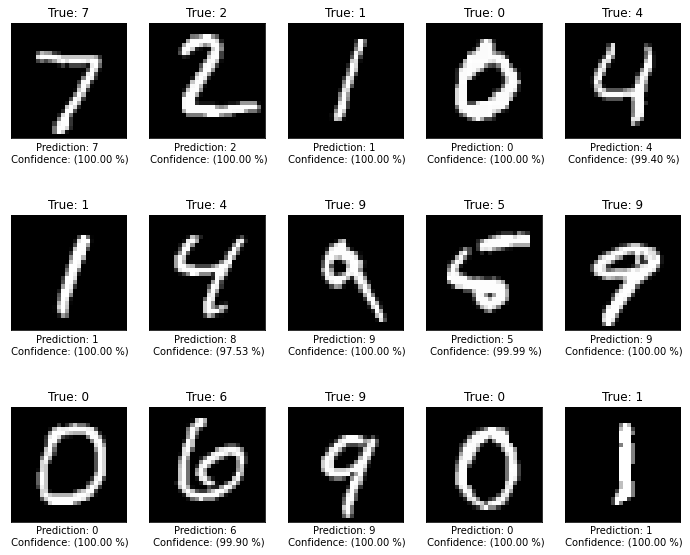

In [38]:
# 예측 결과 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred} \n Confidence: ({confidence:.2f} %)')
plt.tight_layout
plt.show()
